In [1]:
# standard DS imports
import pandas as pd
import numpy as np

# viz and stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from scipy import stats

# for feature selection verification and evaluation 
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# local functions
import wrangle
import explore

# Zillow Project with Clustering

----

## Executvie Summary:

Goals:
- Identify factors evaluated in logerror
- Build a model to best predict logerror
- Minimize Root Square Mean Error (RMSE) in modeling

Key Findings:
- Clustering improved the model negligibly. 
- All models predicted logerror comparable to the baseline.

Takeaways:
 - My best model, OLS Linear Regressor, only reduced the baseline error by 0.3%. 
 - "The Zestimate is too good." -Misty Garcia

Recommendations:
- Implement policies requiring complete information input when adding or update home information. This will reduce the missing values in the dataset and could reduce error. 

----

## 1. Planning

 - Create deliverables:
     - README
     - final_report.ipynb
     - working_report.ipynb
 - Build functional wrangle.py, explore.py, and model.py files
 - Acquire the data from the Code Up database via the wrangle.acquire functions
 - Prepare and split the data via the wrangle.prepare functions
 - Explore the data utilizing clustering and define hypothesis. Run the appropriate statistical tests in order to accept or reject each null hypothesis. Document findings and takeaways.
 - Create a baseline model in predicting home cost and document the RSME.
 - Fit and train three (3) regression models to predict cost on the train dataset.
 - Evaluate the models by comparing the train and validation data.
 - Select the best model and evaluate it on the train data.
 - Develop and document all findings, takeaways, recommendations and next steps. 

-----

## 2. Data Acquisition
In this step, I called my acquire_zillow function from wrangle.py. This function:
- grabs the data from the CodeUp database via a SQL query
- creates a local CSV of the table, if not already saved locally

#### Data Dictionary

| Target | Type | Description |
| ---- | ---- | ---- |
| logerror | float | The log of the error in the zestimate model |


| Feature Name | Type | Description |
| ---- | ---- | ---- |
| area | float | Sum of square feet in the home |
| area12 | float | Finished living area |
| assessment_year| float | year the home was assessed |
| basement_sqft | float |  Finished living area below or partially below ground level |
| bathnbed | float | Number of bathrooms and bedrooms combined |
| baths | float | Count of bathrooms in the home |
| beds | float | Count of bedrooms in the home |
| census | float | tract and block data from the census |
| city_id | float | City in which the property is located (if any) |
| construction_type | str | type of construction the home is classified |
| county | float | Fips code for the county the home is located in |
| county_id | float |County in which the property is located |
| decktype | float | Type of deck (if any) present on parcel |
| fireplace | float | Number of fireplaces in a home (if any) |
| fireplace_flag | float | 1 = Fireplace present, 0 = No Fireplace |
| fullbath | float | Number of full bathrooms (sink, shower + bathtub, and toilet) present in home |
| hottub_or_spa | float | Does the home have a hot tub or spa |
| land_value | float | tax assessed value of the land only |
| landuse_code | str | County land use code i.e. it's zoning at the county level |
| landuse_desc | str | description of the land use |
| lat | float | The home's geographical latitude |
| living_space | float | The home area in sqft minus 200sqft per bedroom and 60sqft per bathroom (average sqft per respective room) |
| long | float | The home's geographical longitude |
| lot_size | float | Sum of square feet of the piece of land the home is on |
| mvp_cluster | int | clusters built using primary home features |
| mvp_0 | unit | cluster 0 of mvp clusters |
| mvp_1 | unit | cluster 1 of mvp clusters |
| mvp_2 | unit | cluster 2 of mvp clusters |
| mvp_3 | unit | cluster 3 of mvp clusters |
| pool | float | Number of pools on the lot (if any) |
| pool10 | float | Spa or Hot Tub |
| pool2 | float | Pool with Spa/Hot Tub |
| pool7 | float | Pool without hot tub |
| price_sqft | float | the home tax_value over the home's area in sqft |
| raw_census | float | Census tract and block ID combined - also contains blockgroup assignment by extension |
| rooms | float | Total number of rooms in the principal residence |
| size_cluster | int | clusters built using size features |
| size_0 | unit | cluster 0 of size clusters |
| size_1 | unit | cluster 1 of size clusters |
| size_2 | unit | cluster 2 of size clusters |
| structure_value | float |The assessed value of the built structure on the parcel |
| taxes | float | taxes on the home's value |
| tax_delq_flag | str | Y if the home is deliquent on paying taxes, N if not |
| tax_delq_year | float | year the home became deliquent on paying taxes, 9999 if not |
| tax_value | float | tax assessed value of the home |
| threequarterbnb | float |Count of three-quarter bathrooms (if any) |
| transactiondate | str | date the home transaction took place |
| value_cluster | int | clusters built using assessed value features |
| value_0 | unit | cluster 0 of value clusters |
| value_1 | unit | cluster 1 of value clusters |
| value_2 | unit | cluster 2 of value clusters |
| yard_size | float | The lot size minus the home area in sqft |
| year_built | float | The year the home was built |
| zip_id | float | Zip code in which the property is located |

In [2]:
zil = wrangle.acquire_zillow()

### Acquisition Takeaways
- The zillow data brings in 58 columns of data covering 52,441 homes. 
- These homes had transactions during 2017 and are tagged as Single Family Residences.

----

## 3. Data Preparation
In this step, I called prepare_zillow from wrangle.py. This function:
- renames columns
- handles nulls and outliers
- feature engineers
- splits the data into train, validate, and test datasets

In [3]:
zil = wrangle.prepare_zillow(zil)

In [4]:
train, val, test = wrangle.split_data(zil)

#### Preparation Takeaways
- Feature engineered price_sqft and living_space in order to better evaluate cost and use of space in each home.
- Before moving to exploration, I split the data into train, validate, and test datasets with a 60/20/20 split.

-----

## 4. Data Exploration

In [5]:
train, val, test = explore.make_clusters(train, val, test)

### Question 1. What continuous features have a relationship with logerror?

<Figure size 1440x1440 with 0 Axes>

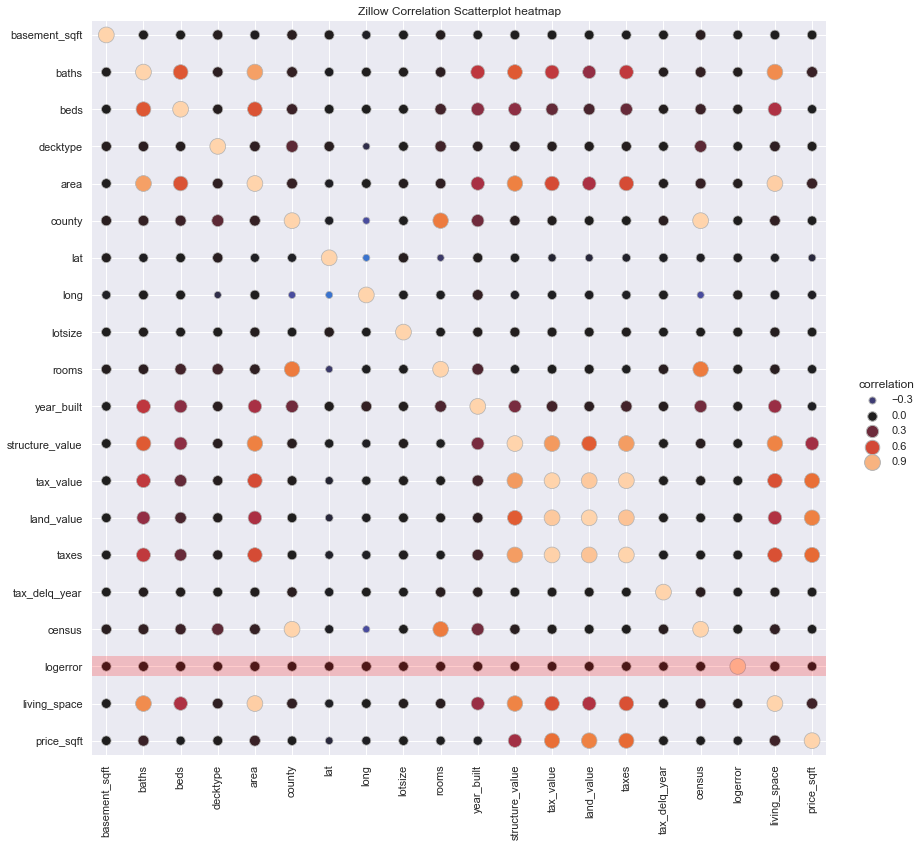

In [6]:
explore.get_q1_vis(train)

#### Question 1 Takeaways:
- There is not any obvious features correlated with the target of logerror.
- There do seem to be relationships with other features that can be explored.

### Question 2. Where is the most logerror?

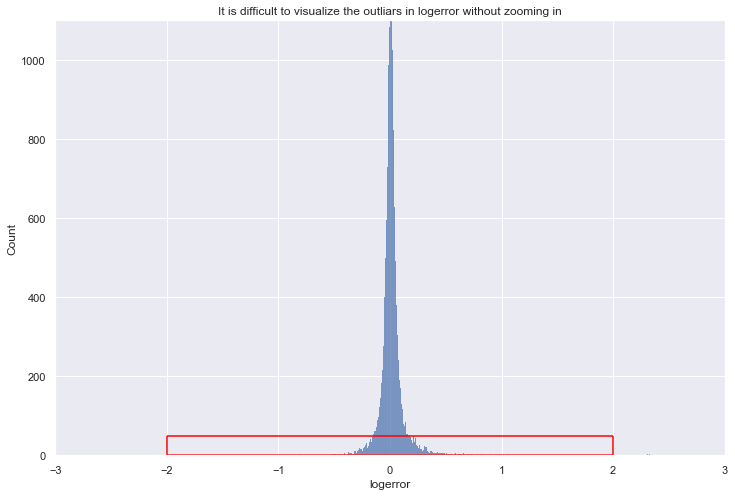

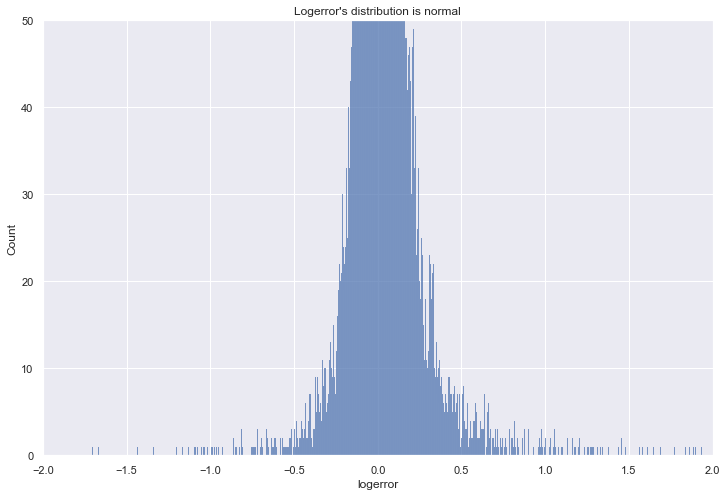

In [7]:
explore.get_q2_vis(train)

#### Hypothesis for Question 2:
- Ho -> The absolute value mean logerror of homes with positive logerror is less than or equal to the absolute value mean logerror of homes with negative logerror. 
- Ha -> The absolute value mean logerror of homes with positive logerror is greater than the absolute value mean logerror of homes with negative logerror. 
- T-Test: One-Sample, One-Tail

In [8]:
explore.get_q2_stats(train)

Fail to Reject the Null Hypothesis.
Findings suggest homes with positive logerror have a lower or equal mean absolute value logerror than homes with a negative logerror.


----

### Question 3. If we cluster our basic home features, is there a relationship with logerror?
This cluster includes: baths, beds, living_space, city_id, tax_value, year_built

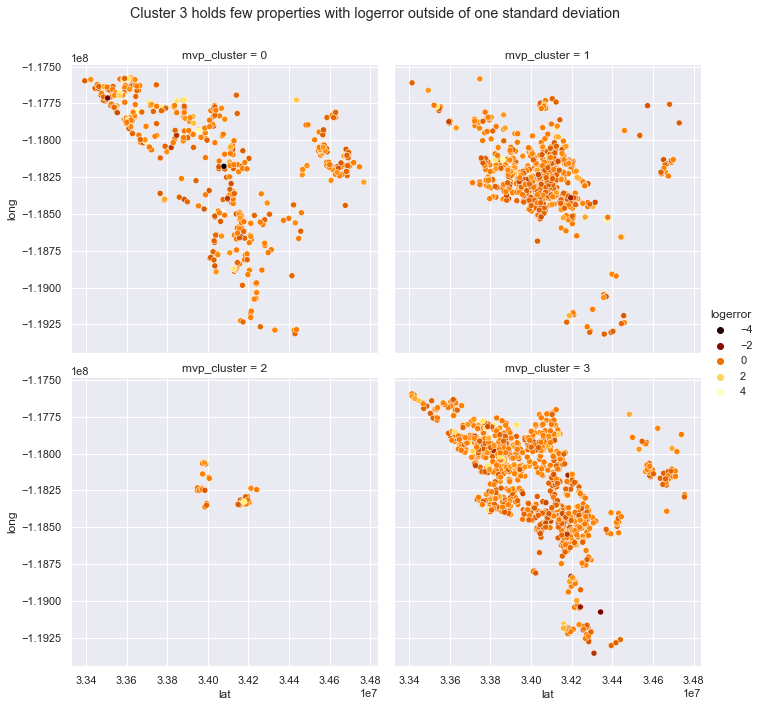

In [9]:
explore.get_q3_vis(train)

#### Hypothesis for Question 3:
- Ho -> Cluster 3 has a greater than or equal mean tax value than the population
- Ha -> Cluster 3 has a lower mean tax value than the population
- T-Test: One-Sample, One-Tail

In [10]:
explore.get_q3_stats(train)

Reject the Null Hypothesis.
    Findings suggest cluster 3 has a lower mean tax value than the population.


----

### Question 4. If we cluster our value related features, is there a relationship with logerror?
This cluster includes: structure_value, tax_value, land_value, taxes, price_sqft

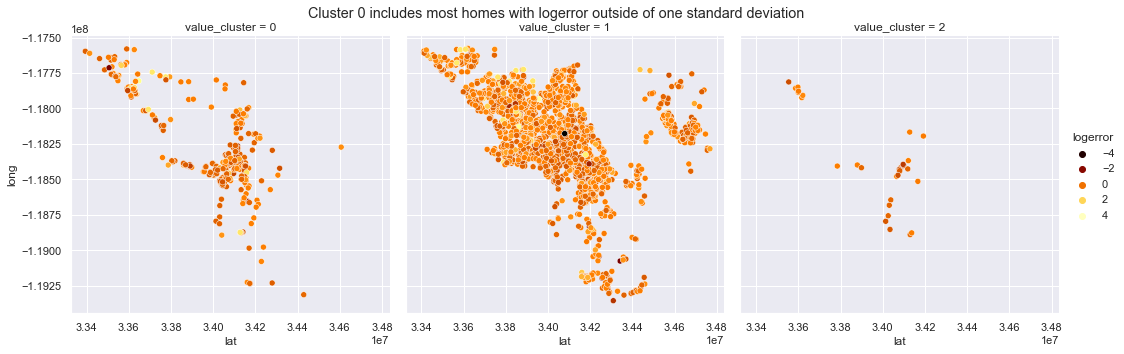

In [11]:
explore.get_q4_vis(train)

Ho -> Cluster 0 has a greater than or equal mean tax value than the population.

Ha -> Cluster 0 has a lower mean tax value than the population.

In [87]:
c0 = train[train.value_cluster==0].tax_value
μ = train.tax_value.mean()

In [92]:
t, p = stats.ttest_1samp(c0, μ)
if p/2 < α and t < 0:
    print('''Reject the Null Hypothesis.
Findings suggest the mean tax value of cluster 0 is less than the population.''')
else:
    print('''Fail to Reject the Null Hypothesis.
Findings suggest the mean tax value of cluster 0 is greater than or equal to the population.''')

Reject the Null Hypothesis.
Findings suggest the mean tax value of cluster 0 is less than the population.


#### Question 4. If we cluster our size related features, is there a relationship with logerror?
This cluster inlcudes: basement_sqft, area, area12, lotsize, living_space

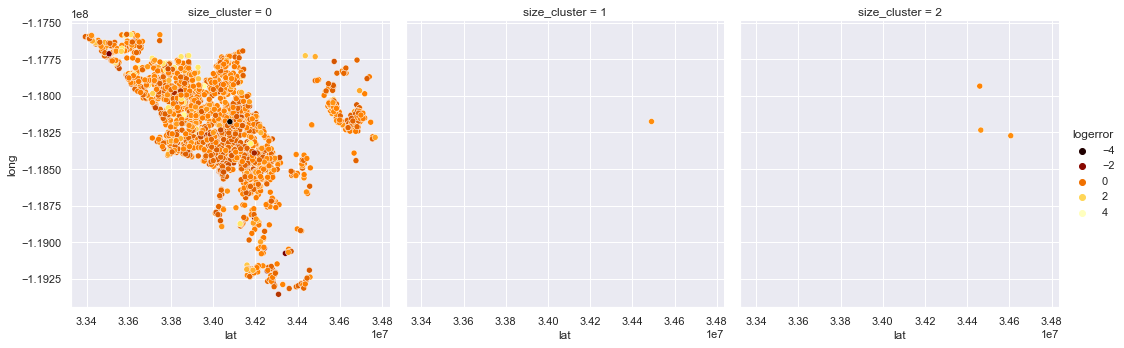

In [31]:
sns.relplot(data=train[(train.logerror > train.logerror.mean()+train.logerror.std())|(train.logerror < train.logerror.mean()-train.logerror.std())], 
            x='lat', 
            y='long', 
            hue='logerror', 
            palette='afmhot',
            col='size_cluster')
plt.show()

Ho -> Cluster 0 has a less than or equal mean living space than the population.

Ha -> Cluster 0 has a greater mean living space than the population.

In [93]:
c0 = train[train.size_cluster== 0].living_space
μ = train.living_space.mean()

In [95]:
t, p = stats.ttest_1samp(c0, μ)
if p/2 < α and t > 0:
    print('''Reject the Null Hypothesis.
Findings suggest Cluster 0 has a greater mean living space than the population.''')
else:
    print('''Fail to Reject the Null Hypothesis.
Findings suggest Cluster 0 has a less than or equal mean living space than the population.''')

Fail to Reject the Null Hypothesis.
Findings suggest Cluster 0 has a less than or equal mean living space than the population.


### Explore Takeaways:
- Without cluster, there is no obvious continuous feature that has a relationship with logerror. 
- Clustering with tax_value seems to play a key role in logerror.
- Clusering by size does not seem to create useful splits in the data from what is human readable. More time is needed to explore this finding.

----

## 5. Data Modeling

#### My goal is to minimize RMSE while maintaining a healthy R<sup>2</sup> in order to minimize error while still being able to account for it.
Select features were dropped in order to maximize model fitting based on all findings. It is highly apparent location metrics play a key role in determining assessed home value. The location feature that was dropped below was split out to be los_angeles, orange, and ventura features in order to prevent skew in modeling. 

| Features Kept | Features Dropped |
| ---- | ---- |
| baths | basement_sqft |
| beds | bathnbed |
| living_space | decktype |
| county | area |
| lat | area12 |
| long | fireplace |
| lotsize | fullbath |
| year_built | hottub_or_spa |
| tax_value | pool |
| price_sqft | landuse_code |
| mvp_0 | census |
| mvp_2 | city_id |
| value_2 | county_id |
|  | zip_id |
|  | rooms |
|  | threequarterbnb |
|  | fireplace_flag |
|  | structure_value |
|  | assessment_year |
|  | land_value |
|  | taxes |
|  | tax_delq_flag |
|  | tax_delq_year |
|  | transactiondate |
|  | construction_type |
|  | landuse_desc |
|  | mvp_clusters 1 and 3 |
|  | value_clusters 0 and 1 |
|  | all size_clusters |

In [114]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['baths', 'beds', 'living_space', 'county', 'lat', 'long', 'lotsize', 'pool', 'city_id','year_built', 'tax_value', 'price_sqft',
                'mvp_0', 'mvp_1', 'mvp_2', 'mvp_3', 
                'value_0', 'value_1', 'value_2',
                'size_0', 'size_1', 'size_2']

train_scaled = train.copy()
val_scaled = val.copy()
test_scaled = test.copy()

# create the scaler and fit it
scaler = MinMaxScaler()
scaler.fit(train[cols_to_scale])

# use the scaler to scale the data and resave
train_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(train[cols_to_scale]),
                                           columns = train[cols_to_scale].columns.values).set_index([train.index.values])
val_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(val[cols_to_scale]),
                                           columns = val[cols_to_scale].columns.values).set_index([val.index.values])
test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(test[cols_to_scale]),
                                           columns = test[cols_to_scale].columns.values).set_index([test.index.values])

In [143]:
X_train, y_train = train_scaled[['baths', 'beds', 'living_space', 'lat', 'long', 'county', 'lotsize', 'year_built', 'tax_value', 'price_sqft',
                'mvp_0', 'mvp_2', 
                # 'value_0', 'value_1', 
                                 'value_2',
                # 'size_0', 'size_1', 'size_2'
                                ]], train.logerror
X_val, y_val = val_scaled[['baths', 'beds', 'living_space', 'lat', 'long', 'county', 'lotsize', 'year_built', 'tax_value', 'price_sqft',
                'mvp_0', 'mvp_2',  
                # 'value_0', 'value_1', 
                           'value_2',
                # 'size_0', 'size_1', 'size_2'
                          ]], val.logerror
X_test, y_test = test_scaled[['baths', 'beds', 'living_space', 'lat', 'long', 'county', 'lotsize', 'year_built', 'tax_value', 'price_sqft',
                'mvp_0', 'mvp_2', 
                # 'value_0', 'value_1', 
                              'value_2',
                # 'size_0', 'size_1', 'size_2'
                             ]], test.logerror

In [150]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)


# Baseline Model
# run the model
pred_mean = y_train.logerror.mean()
y_train['pred_mean'] = pred_mean
y_val['pred_mean'] = pred_mean
y_test['pred_mean'] = pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_mean, squared=False)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_mean, squared=False)

# save the results
metrics = pd.DataFrame(data=[{
    'model': 'baseline_mean',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.logerror, y_train.pred_mean),
    'rmse_val': rmse_val,
    'r2_val': explained_variance_score(y_val.logerror, y_val.pred_mean)
}])


lm = LinearRegression()
lm.fit(X_train, y_train.logerror)
y_train['pred_lm'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lm, squared=False)
y_val['pred_lm'] = lm.predict(X_val)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_lm, squared=False)
# print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
#       "\nValidation/Out-of-Sample: ", rmse_val)

metrics = metrics.append({
    'model': 'OLS',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.logerror, y_train.pred_lm),
    'rmse_val': rmse_val,
    'r2_val': explained_variance_score(y_val.logerror, y_val.pred_lm)
    }, ignore_index=True)

# LassoLars Model
# run the model
lars = LassoLars(alpha=1)
lars.fit(X_train, y_train.logerror)
y_train['pred_lars'] = lars.predict(X_train)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lars, squared=False)
y_val['pred_lars'] = lars.predict(X_val)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_lars, squared=False)

# save the results
metrics = metrics.append({
    'model': 'LarsLasso, alpha 1',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.logerror, y_train.pred_lars),
    'rmse_val': rmse_val,
    'r2_val': explained_variance_score(y_val.logerror, y_val.pred_lars
    )}, ignore_index=True)


# Polynomial Models
# set up the model
pf = PolynomialFeatures(degree=2)
X_train_d2 = pf.fit_transform(X_train)
X_val_d2 = pf.transform(X_val)

# run the model
lm2 = LinearRegression()
lm2.fit(X_train_d2, y_train.logerror)
y_train['pred_lm2'] = lm2.predict(X_train_d2)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lm2, squared=False)
y_val['pred_lm2'] = lm2.predict(X_val_d2)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_lm2, squared=False)

# save the results
metrics = metrics.append({
    'model': 'Quadratic Linear Regression',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.logerror, y_train.pred_lm2),
    'rmse_val': rmse_val,
    'r2_val': explained_variance_score(y_val.logerror, y_val.pred_lm2)
}, ignore_index=True)

# set up the model
pf = PolynomialFeatures(degree=3)
X_train_d2 = pf.fit_transform(X_train)
X_val_d2 = pf.transform(X_val)

# run the model
lm2 = LinearRegression()
lm2.fit(X_train_d2, y_train.logerror)
y_train['pred_lm2'] = lm2.predict(X_train_d2)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lm2, squared=False)
y_val['pred_lm2'] = lm2.predict(X_val_d2)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_lm2, squared=False)

# save the results
metrics = metrics.append({
    'model': 'Cubic Linear Regression',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.logerror, y_train.pred_lm2),
    'rmse_val': rmse_val,
    'r2_val': explained_variance_score(y_val.logerror, y_val.pred_lm2)
}, ignore_index=True)

metrics

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_79455/704974885.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/var/folders

,model,rmse_train,r2_train,rmse_val,r2_val
0,baseline_mean,0.177473,0.000000,0.160623,0.000000
1,OLS,0.177096,0.004242,0.160065,0.006935
2,"LarsLasso, alpha 1",0.177473,0.000000,0.160623,0.000000
3,Quadratic Linear Regression,0.176234,0.013912,0.159844,0.009670
4,Cubic Linear Regression,0.172316,0.057277,0.183327,-0.302682


with size clusters -> OLS 1.6022, 4.93e-3

without size clusters -> OLS 1.6018, 5.515e-3

wihtout size or value clusters -> 1.60149, 5.897e-3

without size or mvp clusters -> 1.60169, 5.654e-3

no clusters -> 1.60136, 6.054e-3

keep mvp, remove pool -> 1.60133, 6.099e-3  

keep mpv, remove pool and county -> 1.60138, 6.038e-3

keep mvp, remove pool and city_id -> 1.60098, 6.527e-3 

keep 1/3 mvp, remove pool and city_id -> 1.60099, 6.509e-3

keep 0/2 mvp, remove pool and city_id -> 1.60080, 6.755e-3 

keep 0/2 mvp, 2 value, remove pool and city_id -> 1.60065, 6.935e-3               <--- WINNER


In [155]:
# run the model
lm = LinearRegression()
lm.fit(X_train, y_train.logerror)
y_train['pred_lm'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lm, squared=False)
y_val['pred_lm'] = lm.predict(X_val)
rmse_val = mean_squared_error(y_val.logerror, y_val.pred_lm, squared=False)
y_test['pred_lm'] = lm.predict(X_test)
rmse_test = mean_squared_error(y_test.logerror, y_test.pred_lm, squared=False)


# save the results
results = pd.DataFrame({'train': 
                           {
                            'rmse': rmse_train, 
                            'r2': explained_variance_score(y_train.logerror, y_train.pred_lm)},
                       'validate': 
                           {
                            'rmse': rmse_val, 
                            'r2': explained_variance_score(y_val.logerror, y_val.pred_lm)},
                       'test': 
                           {
                            'rmse': rmse_test, 
                            'r2': explained_variance_score(y_test.logerror, y_test.pred_lm)}
                      })

In [156]:
results.T

,rmse,r2
train,0.177096,0.004242
validate,0.160065,0.006935
test,0.182304,0.002789


### Modeling Takeaways:
- The quadratic regression model performed best with \\$196,592 RMSE and a .305 R<sup>2</sup> value.
- The cubic regression model appears to be overfit.
- All three models out performed the baseline by at least \\$30,000.
- Despite beating baseline, none of these models are able to predict home value with a high degree of certainty. 
- Going forward I would look into other machine learning methods to create a better fit model.

----

# Conclusion

## -------------->>>>  BELOW NEEDS EDITS   <<<<------------


Home value is assessed through a myraid of metrics taken about the home. Location and area based information have proven the most valuable, but there is still room for improvement. My best model only reduced the root mean squared error by \\$35,000 from the baseline results; a 13% reduction in error.

### Recommendations:
- Evaluate data that tax value assessors use in their assessment. They have a policy and procedure they must follow, and being able to use their process in predicting home value would be essential to building better models moving forward.
- Add data or begin tracking school rankings and crime rates for each neighborhood. I predict sections of homes with higher school ratings and low crime rates will value for more than homes with low school ratings or high crime rates.

### Next Steps:
- Feature engineer more detailed depictions of the use of the area inside the home. Specifically determine the kitchen vs living area sections of the home and see how this effects the model.
- Develop a model using different machine learning techniques focused on geographical distance. Home value is often geographically clusered as depicted in our finidngs. 

----